Load Packages

In [16]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler


In [17]:
#Load data
df = pd.read_pickle("clean_training.pkl")

In [18]:
df

,Rider_id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform_type,is_business,Pickup_weekday,Pickup_time,Distance,Temperature,Travel_time,kmperhour
0,Rider_Id_432,1637,1309,13.8,549,3,True,5,37650,4,20.400000,745,19.328859
1,Rider_Id_856,396,339,13.6,69,3,False,5,42249,16,26.400000,1993,28.901154
2,Rider_Id_155,1023,242,12.5,114,3,True,2,46383,3,23.258889,455,23.736264
3,Rider_Id_855,886,283,14.5,113,3,True,5,34986,9,19.200000,1341,24.161074
4,Rider_Id_770,2311,872,14.1,533,1,False,1,36323,9,15.400000,1214,26.688633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195,Rider_Id_34,20,378,15.0,5,3,True,6,50076,17,29.000000,2325,26.322581
21197,Rider_Id_155,1023,242,12.5,114,3,True,6,38007,7,26.000000,770,32.727273
21198,Rider_Id_697,314,473,13.8,29,3,True,4,64252,20,29.200000,2953,24.381984
21199,Rider_Id_347,2451,1821,14.0,1101,1,False,3,35115,13,15.000000,1380,33.913043


In [19]:
df.dtypes

Rider_id            object
No_Of_Orders         int64
Age                  int64
Average_Rating     float64
No_of_Ratings        int64
Platform_type     category
is_business           bool
Pickup_weekday    category
Pickup_time          int64
Distance             int64
Temperature        float64
Travel_time          int64
kmperhour          float64
dtype: object

In [20]:
dummies = pd.get_dummies(df[["Platform_type", "Pickup_weekday"]])
dummies

,Platform_type_1,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21195,0,0,1,0,0,0,0,0,0,1,0
21197,0,0,1,0,0,0,0,0,0,1,0
21198,0,0,1,0,0,0,0,1,0,0,0
21199,1,0,0,0,0,0,1,0,0,0,0


In [21]:
df = pd.concat([df, dummies], axis=1)
df.drop(columns=["Platform_type", "Pickup_weekday"], inplace=True)

In [22]:
df.dtypes

Rider_id             object
No_Of_Orders          int64
Age                   int64
Average_Rating      float64
No_of_Ratings         int64
is_business            bool
Pickup_time           int64
Distance              int64
Temperature         float64
Travel_time           int64
kmperhour           float64
Platform_type_1       uint8
Platform_type_2       uint8
Platform_type_3       uint8
Platform_type_4       uint8
Pickup_weekday_1      uint8
Pickup_weekday_2      uint8
Pickup_weekday_3      uint8
Pickup_weekday_4      uint8
Pickup_weekday_5      uint8
Pickup_weekday_6      uint8
Pickup_weekday_7      uint8
dtype: object

In [23]:
km_data = df.copy()
km_data

,Rider_id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,is_business,Pickup_time,Distance,Temperature,Travel_time,...,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
0,Rider_Id_432,1637,1309,13.8,549,True,37650,4,20.400000,745,...,0,1,0,0,0,0,0,1,0,0
1,Rider_Id_856,396,339,13.6,69,False,42249,16,26.400000,1993,...,0,1,0,0,0,0,0,1,0,0
2,Rider_Id_155,1023,242,12.5,114,True,46383,3,23.258889,455,...,0,1,0,0,1,0,0,0,0,0
3,Rider_Id_855,886,283,14.5,113,True,34986,9,19.200000,1341,...,0,1,0,0,0,0,0,1,0,0
4,Rider_Id_770,2311,872,14.1,533,False,36323,9,15.400000,1214,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195,Rider_Id_34,20,378,15.0,5,True,50076,17,29.000000,2325,...,0,1,0,0,0,0,0,0,1,0
21197,Rider_Id_155,1023,242,12.5,114,True,38007,7,26.000000,770,...,0,1,0,0,0,0,0,0,1,0
21198,Rider_Id_697,314,473,13.8,29,True,64252,20,29.200000,2953,...,0,1,0,0,0,0,1,0,0,0
21199,Rider_Id_347,2451,1821,14.0,1101,False,35115,13,15.000000,1380,...,0,0,0,0,0,1,0,0,0,0


In [24]:
df.drop(columns=["Rider_id", "kmperhour"], inplace=True)

In [25]:

km_data.drop(columns=["Rider_id"], inplace=True)

In [26]:
km_data

,No_Of_Orders,Age,Average_Rating,No_of_Ratings,is_business,Pickup_time,Distance,Temperature,Travel_time,kmperhour,...,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
0,1637,1309,13.8,549,True,37650,4,20.400000,745,19.328859,...,0,1,0,0,0,0,0,1,0,0
1,396,339,13.6,69,False,42249,16,26.400000,1993,28.901154,...,0,1,0,0,0,0,0,1,0,0
2,1023,242,12.5,114,True,46383,3,23.258889,455,23.736264,...,0,1,0,0,1,0,0,0,0,0
3,886,283,14.5,113,True,34986,9,19.200000,1341,24.161074,...,0,1,0,0,0,0,0,1,0,0
4,2311,872,14.1,533,False,36323,9,15.400000,1214,26.688633,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195,20,378,15.0,5,True,50076,17,29.000000,2325,26.322581,...,0,1,0,0,0,0,0,0,1,0
21197,1023,242,12.5,114,True,38007,7,26.000000,770,32.727273,...,0,1,0,0,0,0,0,0,1,0
21198,314,473,13.8,29,True,64252,20,29.200000,2953,24.381984,...,0,1,0,0,0,0,1,0,0,0
21199,2451,1821,14.0,1101,False,35115,13,15.000000,1380,33.913043,...,0,0,0,0,0,1,0,0,0,0


In [27]:
km_features=km_data.columns
km_features = km_features.delete(km_features.get_loc("Travel_time"))
km_features

Index(['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'is_business',
       'Pickup_time', 'Distance', 'Temperature', 'kmperhour',
       'Platform_type_1', 'Platform_type_2', 'Platform_type_3',
       'Platform_type_4', 'Pickup_weekday_1', 'Pickup_weekday_2',
       'Pickup_weekday_3', 'Pickup_weekday_4', 'Pickup_weekday_5',
       'Pickup_weekday_6', 'Pickup_weekday_7'],
      dtype='object')

In [28]:
features = df.columns
features = features.delete(features.get_loc("Travel_time"))
features

Index(['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'is_business',
       'Pickup_time', 'Distance', 'Temperature', 'Platform_type_1',
       'Platform_type_2', 'Platform_type_3', 'Platform_type_4',
       'Pickup_weekday_1', 'Pickup_weekday_2', 'Pickup_weekday_3',
       'Pickup_weekday_4', 'Pickup_weekday_5', 'Pickup_weekday_6',
       'Pickup_weekday_7'],
      dtype='object')

In [29]:
#Get a smaller sample
sample_df = df.sample(1000)

In [30]:
X = sample_df[features]
y= sample_df["Travel_time"]
y

20099    1557
7787      513
5127      311
4016     1203
7310     2665
         ... 
14933    4855
4355      367
10693    2853
5259     1616
4094      668
Name: Travel_time, Length: 1000, dtype: int64

In [31]:
#
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
#Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features)

model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

640137.8666364542

In [34]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.3903646269369849

<AxesSubplot: >

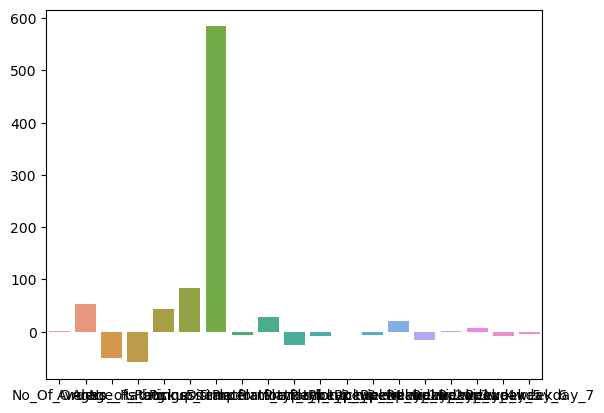

In [35]:
coefficients = np.squeeze(model.coef_)
sns.barplot(x=features, y=coefficients)

In [36]:
X.head()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings,is_business,Pickup_time,Distance,Temperature,Platform_type_1,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
20099,1255,593,14.5,93,True,36513,6,23.258889,0,0,1,0,0,1,0,0,0,0,0
7787,3054,1527,13.9,995,True,41210,4,24.600000,0,0,1,0,1,0,0,0,0,0,0
5127,2187,853,13.1,60,True,62358,1,22.500000,0,0,1,0,0,0,1,0,0,0,0
4016,2208,1281,14.0,585,False,36014,5,17.200000,0,1,0,0,0,0,0,1,0,0,0
7310,483,645,13.5,31,True,59707,10,23.258889,0,0,1,0,0,0,0,0,1,0,0


In [37]:
#Using smaller set of data
useful = ["No_Of_Orders", "Distance", "No_of_Ratings"]

In [38]:
X = df[features]
y= df["Travel_time"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X[useful], y, test_size=0.2, random_state=13)
#Standardizing

model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

564957.8781593404

In [42]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.3760333812110981

## Linear Regression Model that includes km/hour column
- Performs 2x better than the previous
- We must do more feature engineering

In [43]:
X = km_data[km_features]
y= km_data["Travel_time"]

In [44]:
#Add in km/hour
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
#Standardizing

model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

257000.39941043546

In [47]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.7161564136958561

Same model but using less columns (Slightly improved)

In [49]:
useful = ["No_Of_Orders", "Average_Rating", "Distance", "No_of_Ratings", "is_business", "Temperature", "kmperhour"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X[useful], y, test_size=0.2, random_state=13)
#Standardizing

model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [53]:
MSE

256677.52221809007

In [54]:
r2

0.7165130147767158